# Machine Learning ( Supervised)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Ensemble strategies
Ensemble strategies in machine learning are methods that combine the decisions from multiple models to improve the overall performance. This can be compared to a "wisdom of the crowd" approach, where the collective decision is often better than that of any single member of the crowd. Ensemble methods often result in significant improvements in the prediction accuracy of complex problems.

### Random Forests and Extra-Trees
Random Forests and Extra Trees (Extremely Randomized Trees) are both ensemble learning methods that construct a multitude of decision trees at training time and output the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

#### Classification
Classification is a supervised learning approach where a model is trained on data with predefined labels. The goal of classification is to accurately predict the target class for each case in the data. It is one of the two main types of problems solved with supervised machine learning, the other being regression which predicts a continuous output.

In [5]:
# load data
from sklearn import datasets
iris = datasets.load_iris()

In [6]:
# Preprocessing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, 
                    iris.target, test_size=0.2, random_state=0)

In [7]:
# Dimensional Reduction
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
hypothesis = RandomForestClassifier(random_state=101)
scores = cross_val_score(hypothesis, X_train, Y_train, 
                         cv=3, scoring='accuracy')
print ("RandomForestClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

RandomForestClassifier -> cross validation accuracy: mean = 0.950 std = 0.041


In [10]:
hypothesis = ExtraTreesClassifier(random_state=101)
scores = cross_val_score(hypothesis, X_train, Y_train, cv=3, 
                         scoring='accuracy')
print ("ExtraTreesClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

ExtraTreesClassifier -> cross validation accuracy: mean = 0.942 std = 0.042


### Regression

In [11]:
# Loading Data
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()
cali

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [12]:
import numpy as np
feature_names = np.array(cali.feature_names)
feature_names

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype='<U10')

In [13]:
#Preprocessing Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cali.data, 
            cali.target, test_size=0.2, random_state=0)

In [14]:
# Dimensional Reduction
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
hypothesis = RandomForestRegressor(n_estimators=30, random_state=101)
scores = cross_val_score(hypothesis, X_train, Y_train, cv=3, 
                         scoring='neg_mean_absolute_error')
print ("RandomForestClassifier -> cross validation accuracy (neg_mean_absolute_error): mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

RandomForestClassifier -> cross validation accuracy (neg_mean_absolute_error): mean = -0.346 std = 0.001


In [16]:
hypothesis.fit(X_train, Y_train)
Y_pred = hypothesis.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error
print ("MAE", mean_absolute_error(Y_test, Y_pred))

MAE 0.3425307353036175


### Feature importance

In [18]:
# feature_importances_ only works for tree based models
importance = hypothesis.feature_importances_ 
indices = np.argsort(importance)[::-1] 
range1 = range(len(importance[indices]))

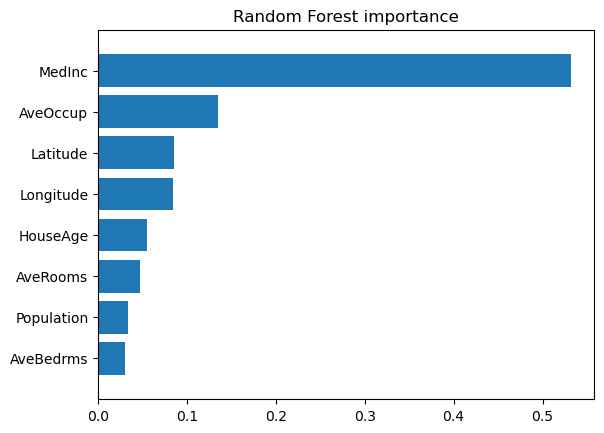

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Random Forest importance")
plt.barh(range1,importance[indices][::-1])
plt.yticks(range1, feature_names[indices][::-1])
plt.ylim([-1, len(range1)])
plt.show()

# Trading Strategies

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
pd.options.mode.chained_assignment = None
# Don't show the waring when writing in a copy slice, not the original data.

### Load Data

In [24]:
dataset = pd.read_csv('AAPL.csv') 
dataset

,Open,High,Low,Close,Adj Close,Volume
0,0.936384,1.004464,0.907924,0.999442,0.850643,535796800
1,0.966518,0.987723,0.903460,0.915179,0.778926,512377600
2,0.926339,0.987165,0.919643,0.928571,0.790324,778321600
3,0.947545,0.955357,0.848214,0.848214,0.721930,767972800
4,0.861607,0.901786,0.852679,0.888393,0.756128,460734400
...,...,...,...,...,...,...
5782,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
5783,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
5784,129.669998,131.029999,125.870003,126.040001,125.847855,85438400
5785,127.989998,130.479996,127.730003,129.610001,129.412415,75703700


### Create Features

In [25]:
dataset = dataset.dropna() 
dataset = dataset[['Open', 'High', 'Low', 'Close']]

dataset['H-L'] = dataset['High'] - dataset['Low'] 
dataset['O-C'] = dataset['Close'] - dataset['Open'] 
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean() 
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean() 

dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean() 
dataset['Std_dev']= dataset['Close'].rolling(5).std() 

dataset['Price_Rise'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise
30,1.029018,1.070871,1.028460,1.062500,0.042411,0.033482,1.006138,0.973214,0.939639,0.033990,0
31,1.051339,1.054688,1.001116,1.018973,0.053572,-0.032366,1.022507,0.989955,0.941741,0.033357,1
32,1.028460,1.031250,1.010045,1.025670,0.021205,-0.002790,1.038504,1.003627,0.945201,0.033203,0
33,1.023438,1.030134,0.989955,0.993304,0.040179,-0.030134,1.035714,1.013951,0.948437,0.025057,1
34,0.983259,1.044085,0.952567,1.016183,0.091518,0.032924,1.012649,1.016853,0.953274,0.025057,1


### EDA

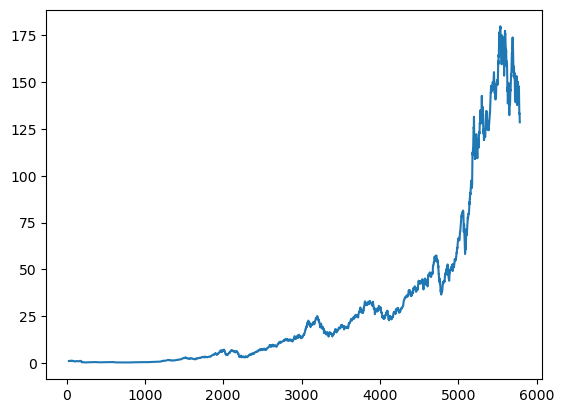

In [26]:
plt.figure()
plt.plot(dataset['3day MA'])
plt.show()

<Axes: xlabel='3day MA', ylabel='Density'>

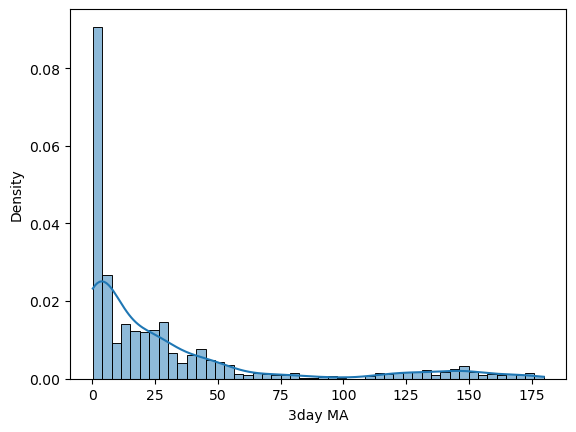

In [27]:
import seaborn as sns
sns.histplot(dataset,x="3day MA", kde=True, stat="density")

### Data preprocessing

‘X’ stores the input features, the columns starting from the fifth column (or index 4) of the dataset till the second last column. The last column will be stored in the dataframe y, which is the value we want to predict, i.e. the price rise.

In [28]:
X = dataset.iloc[:, 4:-1] 
y = dataset.iloc[:, -1]

In [29]:
X

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
30,0.042411,0.033482,1.006138,0.973214,0.939639,0.033990
31,0.053572,-0.032366,1.022507,0.989955,0.941741,0.033357
32,0.021205,-0.002790,1.038504,1.003627,0.945201,0.033203
33,0.040179,-0.030134,1.035714,1.013951,0.948437,0.025057
34,0.091518,0.032924,1.012649,1.016853,0.953274,0.025057
...,...,...,...,...,...,...
5782,2.779999,0.940002,133.326665,137.869000,144.147332,1.471145
5783,2.690002,-1.350006,133.179998,136.839000,143.646999,1.952339
5784,5.159996,-3.629997,131.373332,135.392999,142.991332,3.446848
5785,2.749992,1.620003,129.310000,133.449999,142.249999,2.462544


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_test

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
4635,0.540001,0.087498,47.948334,47.247500,45.629833,0.709724
4636,0.465000,-0.169998,48.260000,47.418000,45.888500,0.381283
4637,0.557499,0.132500,48.395833,47.545500,46.136917,0.256884
4638,0.439999,-0.030003,48.261667,47.634250,46.365917,0.299545
4639,0.365002,0.222500,48.032500,47.700500,46.606833,0.290711
...,...,...,...,...,...,...
5782,2.779999,0.940002,133.326665,137.869000,144.147332,1.471145
5783,2.690002,-1.350006,133.179998,136.839000,143.646999,1.952339
5784,5.159996,-3.629997,131.373332,135.392999,142.991332,3.446848
5785,2.749992,1.620003,129.310000,133.449999,142.249999,2.462544


In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fit Models

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(random_state=101)
classifier.fit(X_train, Y_train)

ExtraTreesClassifier(random_state=101)

In [33]:
from sklearn.metrics import classification_report
Y_pred = classifier.predict(X_test)
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.52      0.06      0.10       544
           1       0.53      0.95      0.68       608

    accuracy                           0.53      1152
   macro avg       0.52      0.50      0.39      1152
weighted avg       0.52      0.53      0.41      1152



## Trading strategies

Next, we create a new column in the dataframe dataset with the column header ‘Y_pred’ and store NaN values in the column. We then store the values of Y_pred into this new column, starting from the rows of the test dataset. This is done by slicing the dataframe using the iloc method as shown in the code above. We then drop all the NaN values

In [34]:
dataset['Y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(Y_pred)):,-1] = Y_pred
trade_dataset = dataset.dropna()
trade_dataset

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred
4635,48.407501,48.520000,47.980000,48.494999,0.540001,0.087498,47.948334,47.247500,45.629833,0.709724,0,1.0
4636,48.535000,48.549999,48.084999,48.365002,0.465000,-0.169998,48.260000,47.418000,45.888500,0.381283,0,1.0
4637,47.792500,48.000000,47.442501,47.924999,0.557499,0.132500,48.395833,47.545500,46.136917,0.256884,0,1.0
4638,47.837502,47.992500,47.552502,47.807499,0.439999,-0.030003,48.261667,47.634250,46.365917,0.299545,1,1.0
4639,47.847500,48.152500,47.787498,48.070000,0.365002,0.222500,48.032500,47.700500,46.606833,0.290711,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5782,130.919998,132.419998,129.639999,131.860001,2.779999,0.940002,133.326665,137.869000,144.147332,1.471145,0,1.0
5783,131.380005,131.410004,128.720001,130.029999,2.690002,-1.350006,133.179998,136.839000,143.646999,1.952339,0,1.0
5784,129.669998,131.029999,125.870003,126.040001,5.159996,-3.629997,131.373332,135.392999,142.991332,3.446848,1,1.0
5785,127.989998,130.479996,127.730003,129.610001,2.749992,1.620003,129.310000,133.449999,142.249999,2.462544,1,1.0


Now that we have the predicted values of the stock movement. We can compute the
returns of the strategy. We will be taking a long position when the predicted value of y is
true and will take a short position when the predicted signal is False.

We first compute the returns that the strategy will earn if a long position is taken at the
end of today, and squared off at the end of the next day. We start by creating a new
column named ‘Tomorrows Returns’ in the trade_dataset and store in it a value of 0. We
use the decimal notation to indicate that floating point values will be stored in this new
column. Next, we store in it the log returns of today, i.e. logarithm of the closing price of
today divided by the closing price of yesterday. Next, we shift these values upwards by one
element so that tomorrow’s returns are stored against the prices of today.

In [35]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

Next, we will compute the Strategy Returns. We create a new column under the header
‘StrategyReturns’ and initialize it with a value of 0. to indicate storing floating point
values. By using the np.where() function, we then store the value in the column
‘Tomorrows Returns’ if the value in the ‘ypred’ column stores True (a long position), else
we would store negative of the value in the column ‘Tomorrows Returns’ (a short
position); into the ‘Strategy Returns’ column.

In [38]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['Y_pred'] == True, 
trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

We now compute the cumulative returns for both the market and the strategy. These values are computed using the cumsum() function. We will use the cumulative sum to plot the graph of market and strategy returns in the last step.

In [39]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

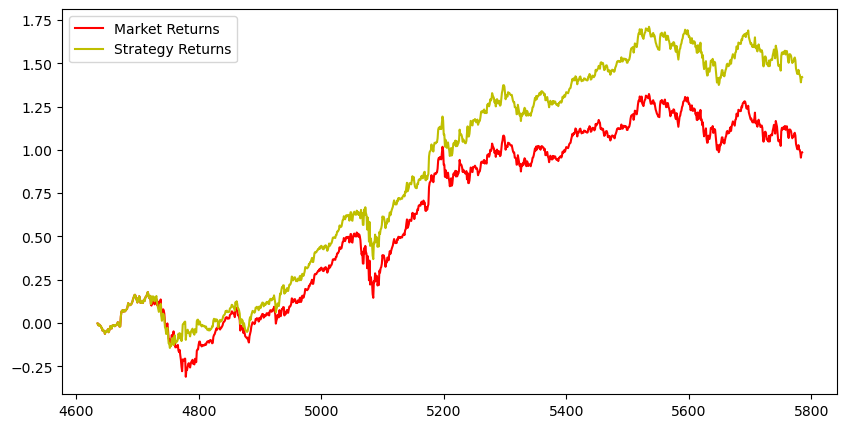

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='y', label='Strategy Returns')
plt.legend()
plt.show()